In [3]:
#dataset link
#https://www.kaggle.com/datasets/sqdartemy/minecraft-screenshots-dataset-with-features

In [4]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
data_path = 'features_and_decisions.csv'
data = pd.read_csv(data_path)

In [6]:
df = data.iloc[:, :10]

In [7]:
df.shape

(6089, 10)

In [8]:
df.head()

,screenshot_title,activity,hearts,light_lvl,in_hand_item,target_mob,decision_activity,decision_hearts,decision_light,decision_mob
0,archering (100).png,archery,11,high,bow,no_mob,give_resistance,give_regeneration_2,no_decision_for_light,no_decision_for_mob
1,archering (108).png,archery,3,high,bow,no_mob,give_resistance,give_regeneration_4,no_decision_for_light,no_decision_for_mob
2,archering (112).png,archery,3,high,bow,no_mob,give_resistance,give_regeneration_4,no_decision_for_light,no_decision_for_mob
3,archering (12).png,archery,20,high,bow,no_mob,give_resistance,no_decision_for_hearts,no_decision_for_light,no_decision_for_mob
4,archering (1546).png,archery,15,high,bow,other,give_resistance,give_regeneration_1,no_decision_for_light,no_decision_for_mob


In [9]:
label_encoder = LabelEncoder()

categorical_columns = df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

In [10]:
df.head(5)

,screenshot_title,activity,hearts,light_lvl,in_hand_item,target_mob,decision_activity,decision_hearts,decision_light,decision_mob
0,1,0,11,0,2,2,2,1,0,1
1,7,0,3,0,2,2,2,3,0,1
2,11,0,3,0,2,2,2,3,0,1
3,17,0,20,0,2,2,2,4,0,1
4,53,0,15,0,2,3,2,0,0,1


In [11]:
df['decision_mob'].value_counts()

decision_mob
1    4591
3     730
2     569
0     199
Name: count, dtype: int64

In [12]:
df.isnull().sum()

screenshot_title     0
activity             0
hearts               0
light_lvl            0
in_hand_item         0
target_mob           0
decision_activity    0
decision_hearts      0
decision_light       0
decision_mob         0
dtype: int64

In [13]:
df.duplicated().sum()

7

In [14]:
df.drop_duplicates(keep='first', inplace=True)

In [15]:
X = df.drop(columns=['decision_mob'])
Y = df['decision_mob']
scaler =  StandardScaler()
X = scaler.fit_transform(X)

In [16]:
X.shape

(6082, 9)

In [17]:
Y.shape

(6082,)

In [18]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [19]:
x_train.shape

(4865, 9)

In [20]:
x_test.shape

(1217, 9)

In [21]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]
max_features = ['log2', 'sqrt']
max_dept = [3,5,None]
min_samples_split = [5, 10]
min_samples_leaf = [1, 5]
bootstrap = [True, False]

In [22]:
param_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_dept,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap}

In [23]:
param_grid

{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
 'max_features': ['log2', 'sqrt'],
 'max_depth': [3, 5, None],
 'min_samples_split': [5, 10],
 'min_samples_leaf': [1, 5],
 'bootstrap': [True, False]}

In [24]:
randomForestModel = RandomForestClassifier()

In [25]:
model_grid = GridSearchCV(estimator = randomForestModel, param_grid = param_grid, cv= 3, n_jobs= -1, verbose= 2, error_score='raise')

In [26]:
model_grid.fit(x_train, y_train)

Fitting 3 folds for each of 480 candidates, totalling 1440 fits


GridSearchCV(cv=3, error_score='raise', estimator=RandomForestClassifier(),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [3, 5, None],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': [1, 5],
                         'min_samples_split': [5, 10],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]},
             verbose=2)

In [27]:
model_grid.best_params_

{'bootstrap': True,
 'max_depth': None,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 80}

In [28]:
model_random = RandomizedSearchCV(estimator=randomForestModel, param_distributions = param_grid, n_iter=200, cv= 5, n_jobs= -1, verbose= 2)

In [ ]:
model_random.fit(x_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


In [ ]:
random_best_params = model_random.best_params_
random_best_params

{'n_estimators': 50,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': None,
 'bootstrap': False}

In [ ]:
model_grid.score(x_train, y_train)

0.998355601233299

In [ ]:
model_grid.score(x_test, y_test)

0.9917830731306492

In [ ]:
model_random.score(x_train, y_train)

0.9979445015416238

In [ ]:
model_random.score(x_test, y_test)

0.990139687756779

In [ ]:
randomForestModel.set_params(**random_best_params)

RandomForestClassifier(bootstrap=False, max_features='log2',
                       min_samples_split=10, n_estimators=50)

In [ ]:
randomForestModel.fit(x_train, y_train)

RandomForestClassifier(bootstrap=False, max_features='log2',
                       min_samples_split=10, n_estimators=50)

In [ ]:
y_pred = randomForestModel.predict(x_test)

In [ ]:
y_prob = randomForestModel.predict_proba(x_test)

In [ ]:
accuracy = randomForestModel.score(x_test, y_test)
accuracy

0.9884963023829088

In [ ]:
roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')
roc_auc

np.float64(0.9998904641154605)

In [ ]:
print("Classification Report : \n",classification_report(y_test, y_pred))


Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       0.99      1.00      0.99       924
           2       1.00      0.99      0.99       100
           3       0.99      0.92      0.96       154

    accuracy                           0.99      1217
   macro avg       0.99      0.98      0.99      1217
weighted avg       0.99      0.99      0.99      1217



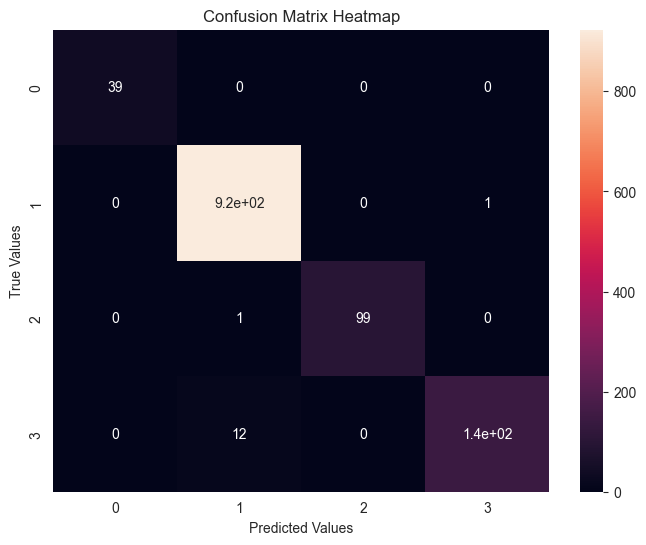

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, xticklabels=True, yticklabels=True)
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()


In [ ]:
logisticRegressionModel = LogisticRegression() 

In [ ]:
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],  
    'C': [0.01, 0.1, 1, 10],
    'solver': ['saga'], 
    'max_iter': [500, 1000, 1500],
    'l1_ratio': [0.1, 0.5, 0.9]    
}

In [ ]:
model_grid = GridSearchCV(estimator = logisticRegressionModel, param_grid = param_grid, cv= 3, n_jobs= -1, verbose= 2, error_score='raise')

In [ ]:
model_grid.fit(x_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


D:\PycharmProjects\PAI\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
D:\PycharmProjects\PAI\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=3, error_score='raise', estimator=LogisticRegression(),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10], 'l1_ratio': [0.1, 0.5, 0.9],
                         'max_iter': [500, 1000, 1500],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['saga']},
             verbose=2)

In [ ]:
grid_best_params = model_grid.best_params_
grid_best_params

{'C': 10, 'l1_ratio': 0.1, 'max_iter': 500, 'penalty': 'l1', 'solver': 'saga'}

In [ ]:
model_random = RandomizedSearchCV(estimator=logisticRegressionModel, param_distributions = param_grid, cv= 5, n_jobs= -1, verbose= 2)

In [ ]:
model_random.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


D:\PycharmProjects\PAI\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
D:\PycharmProjects\PAI\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 10],
                                        'l1_ratio': [0.1, 0.5, 0.9],
                                        'max_iter': [500, 1000, 1500],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['saga']},
                   verbose=2)

In [ ]:
random_best_params = model_random.best_params_
random_best_params

{'solver': 'saga', 'penalty': 'l1', 'max_iter': 1000, 'l1_ratio': 0.1, 'C': 10}

In [ ]:
model_grid.score(x_train, y_train)

0.8918807810894142

In [ ]:
model_grid.score(x_test, y_test)

0.8800328677074774

In [ ]:
model_random.score(x_train, y_train)

0.8918807810894142

In [ ]:
model_random.score(x_test, y_test)

0.8800328677074774

In [ ]:
logisticRegressionModel.set_params(**random_best_params)

LogisticRegression(C=10, l1_ratio=0.1, max_iter=1000, penalty='l1',
                   solver='saga')

In [ ]:
logisticRegressionModel.fit(x_train, y_train)

D:\PycharmProjects\PAI\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
D:\PycharmProjects\PAI\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=10, l1_ratio=0.1, max_iter=1000, penalty='l1',
                   solver='saga')

In [ ]:
y_pred = logisticRegressionModel.predict(x_test)

In [ ]:
y_prob = logisticRegressionModel.predict_proba(x_test)

In [ ]:
accuracy = logisticRegressionModel.score(x_test, y_test)
accuracy

0.8800328677074774

In [ ]:
ruc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')
ruc_auc

np.float64(0.9616820624729672)

In [ ]:
print("Classification Report : \n",classification_report(y_test, y_pred))

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       0.92      0.95      0.93       924
           2       0.66      0.56      0.61       100
           3       0.73      0.66      0.70       154

    accuracy                           0.88      1217
   macro avg       0.83      0.79      0.81      1217
weighted avg       0.87      0.88      0.88      1217



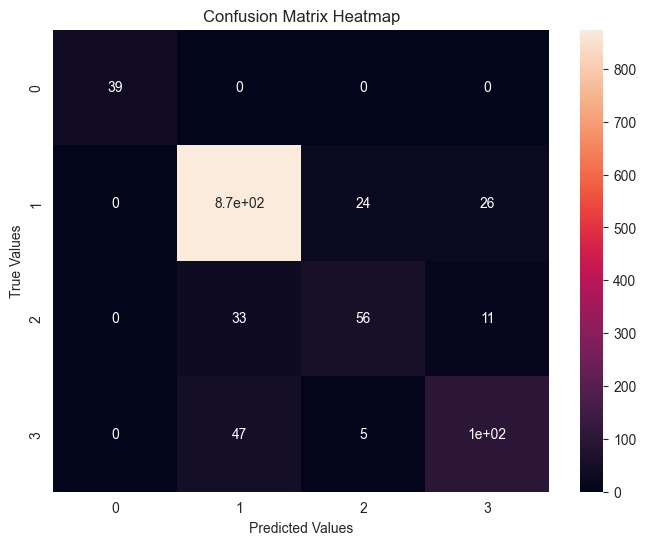

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, xticklabels=True, yticklabels=True)
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()

In [ ]:
comparison = {
    'Algorithm': ['Random Forest', 'Logistic Regression', 'XGBoost'],
    'Accuracy': [0.99, 0.88, 0.99],
    'Precision': [0.99, 0.87, 0.99],
    'Recall': [0.99, 0.88, 0.99],
    'F1-Score': [0.99, 0.88, 0.99],
    'ROC AUC': [0.99, 0.96, 0.99],
    'Best hyperparameters': ["n_estimators: 20, min_samples_split: 10, min_samples_leaf: 1, max_features: log2, max_depth: None, bootstrap: False", 
                             "solver: saga, penalty: elasticnet, max_iter: 500, l1_ratio: 0.1, C: 10","subsample: 0.9, n_estimators: 100, min_child_weight: 2, max_depth: 5,learning_rate: 0.09, gamma: 0, colsample_bytree: 0.8"],
    'Execution time (s)': [128, 60, 73],
    'Remarks': [' Achieved excellent overall performance with high precision and recall, making it a robust choice for the dataset.',
                'Delivered decent results, with slightly lower accuracy and precision compared to other models, but still reliable for simpler scenarios.',
                'Matched Random Forest in performance, excelling in all metrics, and is well-suited for handling complex patterns effectively.']
}

In [ ]:
table = pd.DataFrame(comparison)
table

,Algorithm,Accuracy,Precision,Recall,F1-Score,ROC AUC,Best hyperparameters,Execution time (s),Remarks
0,Random Forest,0.99,0.99,0.99,0.99,0.99,"n_estimators: 20, min_samples_split: 10, min_s...",128,Achieved excellent overall performance with h...
1,Logistic Regression,0.88,0.87,0.88,0.88,0.96,"solver: saga, penalty: elasticnet, max_iter: 5...",60,"Delivered decent results, with slightly lower ..."
2,XGBoost,0.99,0.99,0.99,0.99,0.99,"subsample: 0.9, n_estimators: 100, min_child_w...",73,"Matched Random Forest in performance, excellin..."
